In [13]:
import os
%pwd

'/workspaces/mlproject_wine_quality'

In [14]:
# os.chdir('../')
%pwd

'/workspaces/mlproject_wine_quality'

In [15]:

from dataclasses import dataclass
from pathlib import Path

@dataclass
class DataVisualizationConfig:
    data_path: Path


In [16]:
from wine_quality_predictor.constants import *
from wine_quality_predictor.utils.common import read_yaml, make_directory

class ConfigurationManager:
    def __init__(
        self,
        config_filepath: Path = CONFIG_FILE_PATH,
        params_filepath: Path = PARAMS_FILE_PATH,
        schema_filepath: Path = SCHEMA_FILE_PATH
    ):
        self.config_filepath = config_filepath
        self.params_filepath = params_filepath
        self.schema_filepath = schema_filepath

        self.config = read_yaml(Path(self.config_filepath))
        self.params = read_yaml(Path(self.params_filepath))
        self.schema = read_yaml(Path(self.schema_filepath))

        make_directory(Path(self.config.artifacts_root))
    
    def get_data_visualization_config(self) -> DataVisualizationConfig:
        config = self.config.data_visualization
        return DataVisualizationConfig(data_path=Path(config.data_path))

In [17]:
# src/wine_quality_predictor/components/visualizer.py

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wine_quality_predictor import logger  # Make sure logger is imported from your utils
# from wine_quality_predictor.entity.config_entity import DataVisualizationConfig


class DataVisualization:
    def __init__(self, config: DataVisualizationConfig):
        self.config = config

    def load_data(self):
        logger.info(f"Loading data from {self.config.data_path}")
        # return pd.read_csv(self.config.data_path, delimiter=";", quotechar='"')
        return pd.read_csv(self.config.data_path)

    def scatter_plot(self):
        df = self.load_data()
        features = df.columns.drop("quality")
        logger.info("Creating scatter plots...")
        plt.figure(figsize=(16, 12))

        for idx, feature in enumerate(features):
            plt.subplot(4, 3, idx + 1)
            sns.scatterplot(data=df, x=feature, y="quality", alpha=0.6)
            plt.title(f"{feature} vs Quality")
            plt.tight_layout()

        plt.suptitle("Feature vs Target Scatter Plots", fontsize=18, y=1.02)
        plt.show()

    def plot_histograms(self):
        df = self.load_data()
        logger.info("Generating histograms for all features...")
        df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
        plt.tight_layout()
        plt.suptitle("Histogram of All Features", fontsize=16)
        plt.subplots_adjust(top=0.92)
        plt.savefig("artifacts/data_visualization/histograms.png")
        plt.close()
        logger.info("Histogram plot saved at: artifacts/data_visualization/histograms.png")


[2025-04-13 08:19:49,184] INFO - 716396113 - >>>>> Starting Data Visualization stage <<<<<
[2025-04-13 08:19:49,193] INFO - common - Loaded YAML file from: config/config.yaml
[2025-04-13 08:19:49,195] INFO - common - Loaded YAML file from: params.yaml
[2025-04-13 08:19:49,199] INFO - common - Loaded YAML file from: schema.yaml
[2025-04-13 08:19:49,202] INFO - common - Created directory: artifacts
[2025-04-13 08:19:49,202] INFO - 3148952985 - Loading data from artifacts/data_ingestion/unzipped_data/winequality-red.csv
[2025-04-13 08:19:49,207] INFO - 3148952985 - Creating scatter plots...


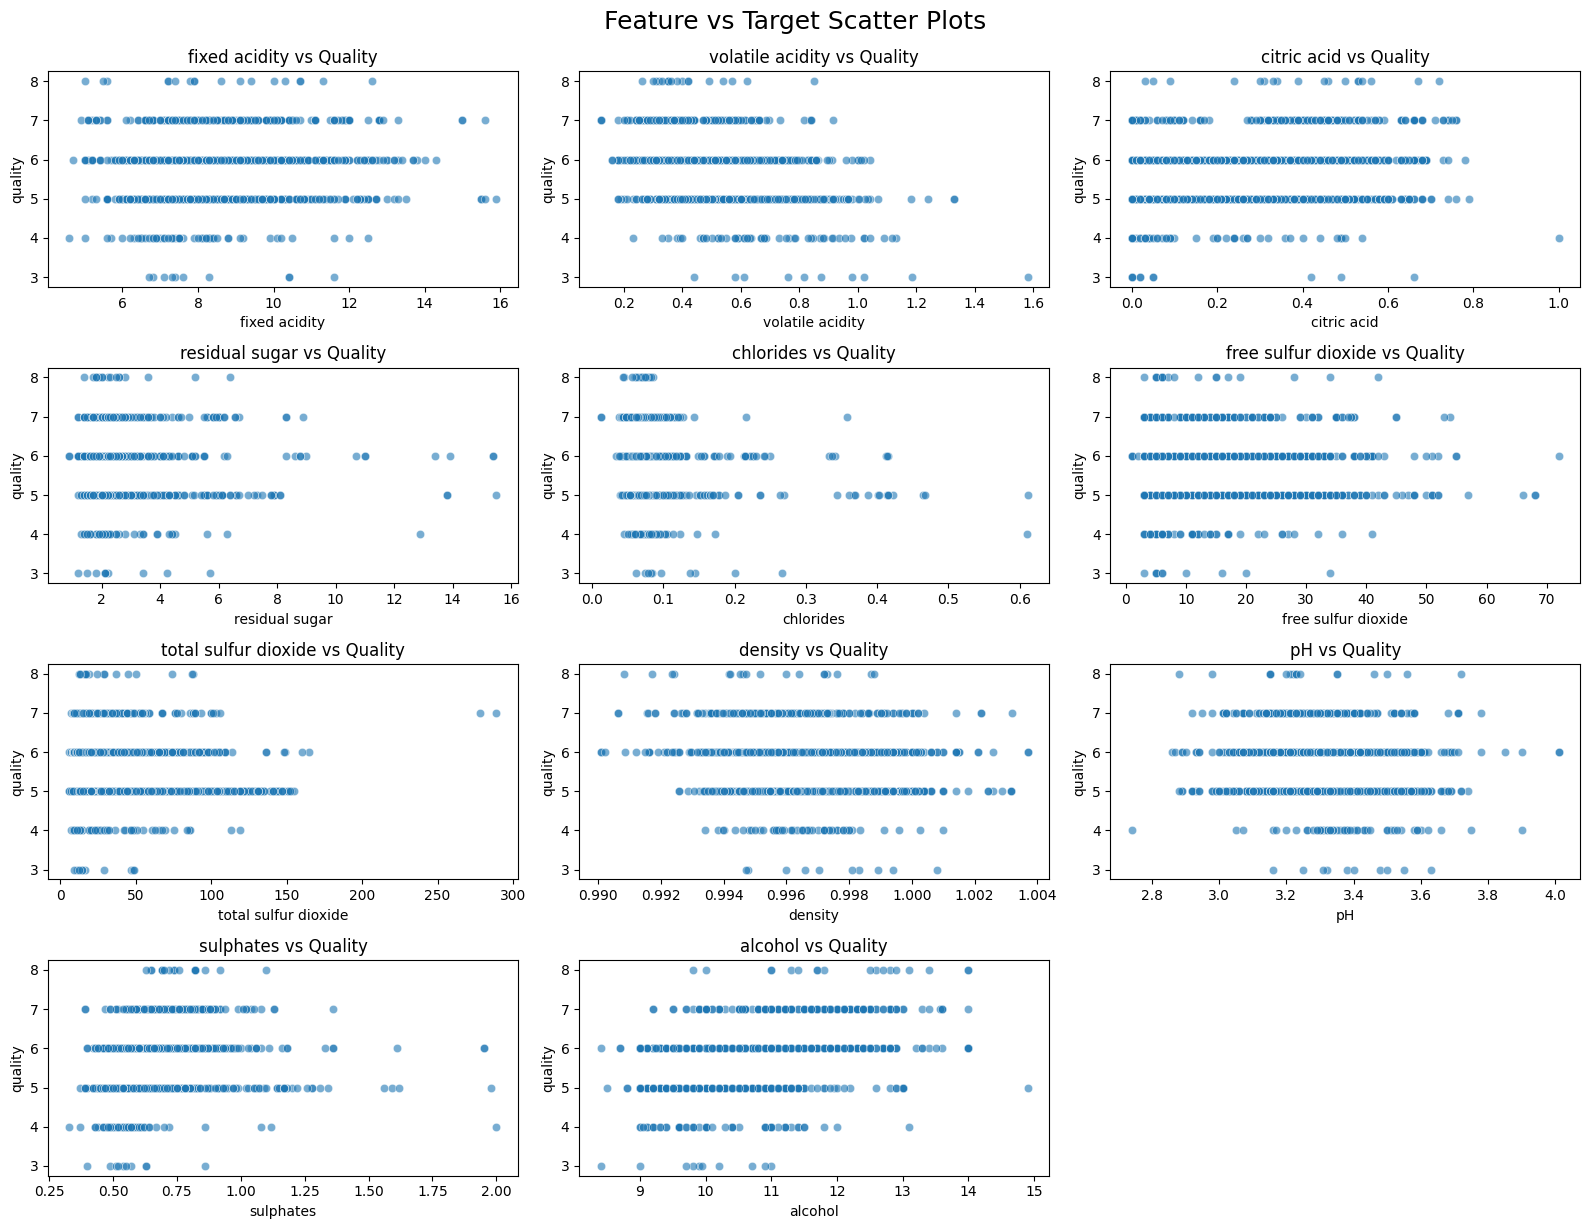

[2025-04-13 08:19:51,458] INFO - 3148952985 - Loading data from artifacts/data_ingestion/unzipped_data/winequality-red.csv
[2025-04-13 08:19:51,461] INFO - 3148952985 - Generating histograms for all features...
[2025-04-13 08:19:52,987] INFO - 3148952985 - Histogram plot saved at: artifacts/data_visualization/histograms.png
[2025-04-13 08:19:52,988] INFO - 716396113 - >>>>> Data Visualization completed <<<<<



In [18]:
# pipeline/visualization_pipeline.py

# from src.<your_project>.config.configuration import ConfigurationManager
# from src.<your_project>.components.visualizer import DataVisualization
from wine_quality_predictor import logger

try:
    logger.info(">>>>> Starting Data Visualization stage <<<<<")
    config = ConfigurationManager()
    vis_config = config.get_data_visualization_config()

    visualizer = DataVisualization(config=vis_config)
    visualizer.scatter_plot()
    visualizer.plot_histograms()

    logger.info(">>>>> Data Visualization completed <<<<<\n")

except Exception as e:
    logger.exception(f"Error in Data Visualization stage: {e}")
    raise e
